# **Section 1: Dataset name**
My Dataset name is "saru_week10_data.pickle". It contains a list of data. Each data contains numpy array form of image and related category.

# **Section 2: Explanation of my data**
The main folder of my dataset is "saru_week10_data" containing 3 subfolder - crying, happy and sleeping (for each category or class). 
First, I downloaded a lot of images from google search using "Download All Images" chrome extension for each class (about 3000 images for each class). Then, I went through each sub-directories and deleted all the unrelated images. So, now "crying" has 564 images, "happy" has 815 images and "sleeping" has 609 images.

Then, I created training data out of it using pickle library and saved as "saru_week10_data.pickle". Each instance of my dataset contains array form of image and its related class as a list. Datatype of array image is uint8 and shape is 100 x 60 pixels.

In [2]:
#importing necessary libraries at first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

I use google colab. So, I first uploaded my folder as zip file and unzip it using following code.

In [3]:
!unzip -q saru_week10_data.zip

In [4]:
dir = 'saru_week10_data'

In [5]:
categories = ['crying','happy','sleeping']

In [6]:
ImgSizeW = 60
ImgSizeH = 90

In [7]:
#function to create training dataset
def createTrainingData():
    trainingData = []
    for category in categories:
        path = os.path.join(dir,category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(ImgSizeW,ImgSizeH))
                trainingData.append([new_array,category])
            except:
                pass
    return trainingData

In [8]:
dataset = createTrainingData() #creating dataset

100%|██████████| 588/588 [00:03<00:00, 177.77it/s]


In [9]:
len(dataset) #total length of my dataset

1805

In [10]:
first_img = dataset[0][0]
print(f'Shape of image: {first_img.shape}')
print(f'Datatype of image: {first_img.dtype}')
print(f'Image type: {type(first_img)}')


Shape of image: (90, 60, 3)
Datatype of image: uint8
Image type: <class 'numpy.ndarray'>


# **Saving my dataset as pickle file**

In [11]:
import pickle

In [12]:
pickleOut = open('saru_week10_data.pickle','wb')
pickle.dump(dataset,pickleOut)
pickleOut.close()

# **Section 3: Loading my dataset**

In [13]:
pickleIn = open('saru_week10_data.pickle','rb')
data = pickle.load(pickleIn)

In [14]:
data[0] #first instance of my data

[array([[[125, 152, 186],
         [129, 156, 190],
         [126, 154, 187],
         ...,
         [ 11,  17,  40],
         [ 16,  21,  44],
         [ 13,  19,  42]],
 
        [[127, 154, 188],
         [136, 163, 197],
         [135, 162, 196],
         ...,
         [ 12,  16,  40],
         [ 14,  18,  42],
         [ 12,  16,  40]],
 
        [[136, 161, 195],
         [140, 165, 199],
         [132, 157, 191],
         ...,
         [ 11,  16,  37],
         [ 10,  15,  36],
         [  8,  14,  35]],
 
        ...,
 
        [[ 25,  39, 107],
         [ 42,  62, 136],
         [ 68,  87, 156],
         ...,
         [158, 194, 230],
         [158, 195, 231],
         [132, 180, 214]],
 
        [[ 27,  39, 106],
         [ 43,  62, 137],
         [ 66,  84, 159],
         ...,
         [157, 193, 229],
         [162, 200, 235],
         [131, 180, 213]],
 
        [[ 30,  40, 103],
         [ 45,  62, 137],
         [ 65,  82, 159],
         ...,
         [154, 190, 226],
  

# **Section 4: Showing data**

In [15]:
len(data) #total number of data

1805

In [16]:
#counting total number of data in each class
dict_ = {'crying':0,'happy':0,'sleeping':0}
for value in data:
  dict_[value[1]]+=1

In [17]:
valueCount = pd.DataFrame(dict_,index=['TotalRecords'])
valueCount

,crying,happy,sleeping
TotalRecords,437,780,588


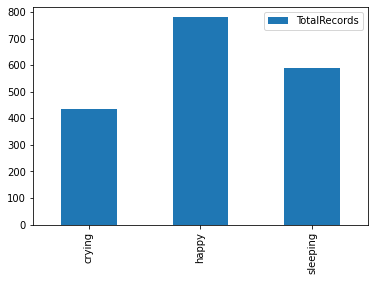

In [18]:
valueCount.transpose().plot(kind='bar') #histogram of distribution of my data

In [19]:
import random
random.shuffle(data) #shuffling the data

# **Plotting 16 images with its label**

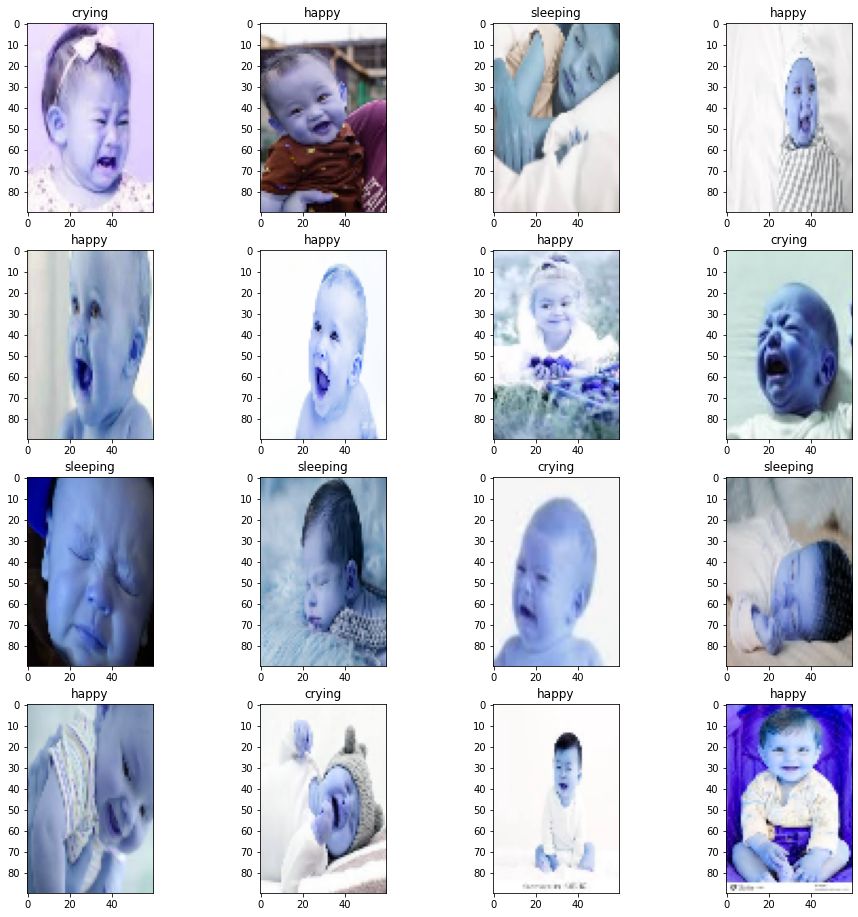

In [20]:
plt.figure(figsize=(16,16))
column = 4
row = 4
for i in range(1,row*column + 1):
  plt.subplot(row,column,i)
  plt.imshow(data[i][0])
  plt.title(data[i][1])
plt.show()

# **Splitting data into train, test set**
I am going to split the dataset into 80% training set and 20% testing set. In the following code, setting test_size=0.2 will do that.

In [21]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)
print(y[:10])

['crying' 'crying' 'happy' 'sleeping' 'happy' 'happy' 'happy' 'happy'
 'crying' 'sleeping']


In [22]:
y = np.unique(y,return_inverse=True)[1]
print(y[:10])

[0 0 1 2 1 1 1 1 0 2]


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_cls,y_test_cls = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
print(x_train.shape,x_test.shape,y_train_cls.shape,y_test_cls.shape)

(1444, 90, 60, 3) (361, 90, 60, 3) (1444,) (361,)


In [25]:
from keras.utils import to_categorical

y_train = to_categorical(y_train_cls,3)
y_test = to_categorical(y_test_cls,3)

In [26]:
y_train.shape

(1444, 3)

# **Building a CNN architecture**

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten
from keras.optimizers import Adam, SGD

In [28]:
def get_model(classes=3):
     #Initialising the CNN
    model = Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape =(90,60,3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [29]:
model = get_model()

# **Training and evaluating the model**

In [30]:
epochs = 50
myModel = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
46/46 [==============================] - 1s 29ms/step - loss: 5.3495 - accuracy: 0.4494 - val_loss: 2.6280 - val_accuracy: 0.4404
Epoch 2/50
46/46 [==============================] - 1s 22ms/step - loss: 1.1646 - accuracy: 0.5679 - val_loss: 2.8314 - val_accuracy: 0.4626
Epoch 3/50
46/46 [==============================] - 1s 22ms/step - loss: 0.8546 - accuracy: 0.6551 - val_loss: 0.9933 - val_accuracy: 0.5097
Epoch 4/50
46/46 [==============================] - 1s 22ms/step - loss: 0.7344 - accuracy: 0.6988 - val_loss: 1.3332 - val_accuracy: 0.3601
Epoch 5/50
46/46 [==============================] - 1s 22ms/step - loss: 0.6199 - accuracy: 0.7632 - val_loss: 1.1586 - val_accuracy: 0.4460
Epoch 6/50
46/46 [==============================] - 1s 22ms/step - loss: 0.5074 - accuracy: 0.7881 - val_loss: 1.7456 - val_accuracy: 0.4100
Epoch 7/50
46/46 [==============================] - 1s 22ms/step - loss: 0.4190 - accuracy: 0.8386 - val_loss: 0.8634 - val_accuracy: 0.6620
Epoch 8/50
46

In [31]:
model.evaluate(x_train,y_train)

46/46 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.9945


[0.034270331263542175, 0.9944598078727722]

In [32]:
model.save("baby_emotion")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: baby_emotion/assets


In [33]:
#making zip file of our model
import shutil
shutil.make_archive('baby_emotion', 'zip', 'baby_emotion')

'/content/baby_emotion.zip'

In [34]:
from tensorflow import keras

loaded_model = keras.models.load_model("baby_emotion")

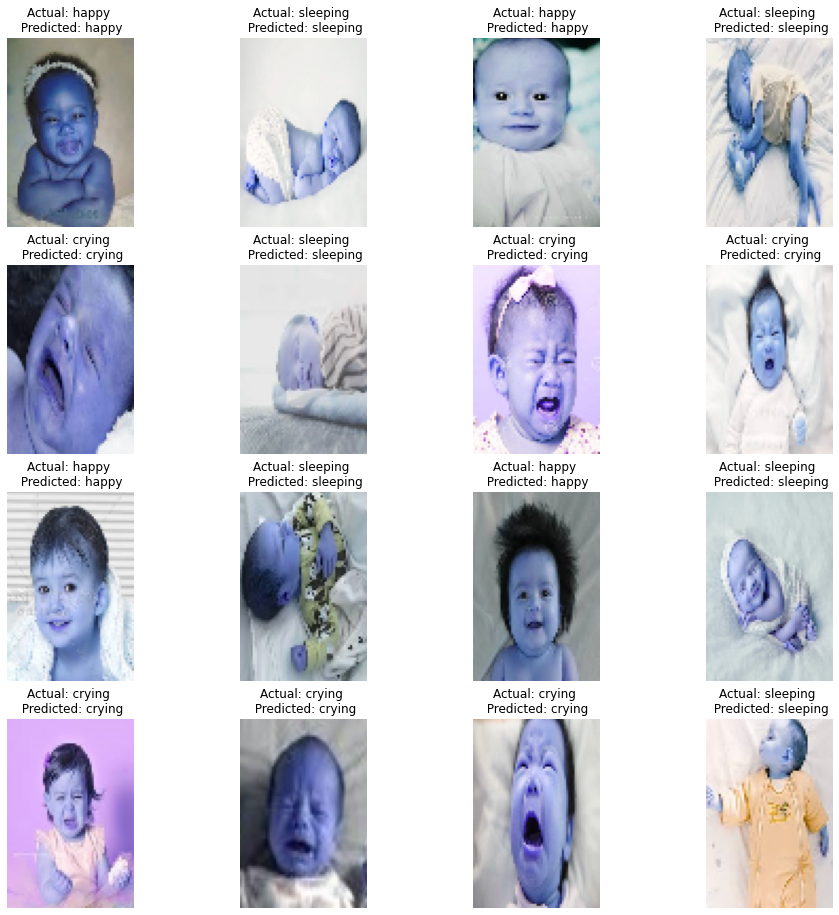

In [36]:
prediction_train = loaded_model.predict_classes(x_train)

plt.figure(figsize=(16,16))

for i in range(1,row*column + 1):
  plt.subplot(row,column,i)
  plt.imshow(x_train[i])
  plt.title(f'Actual: {categories[y_train_cls[i]]} \n Predicted: {categories[prediction_train[i]]}')
  plt.axis('off')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


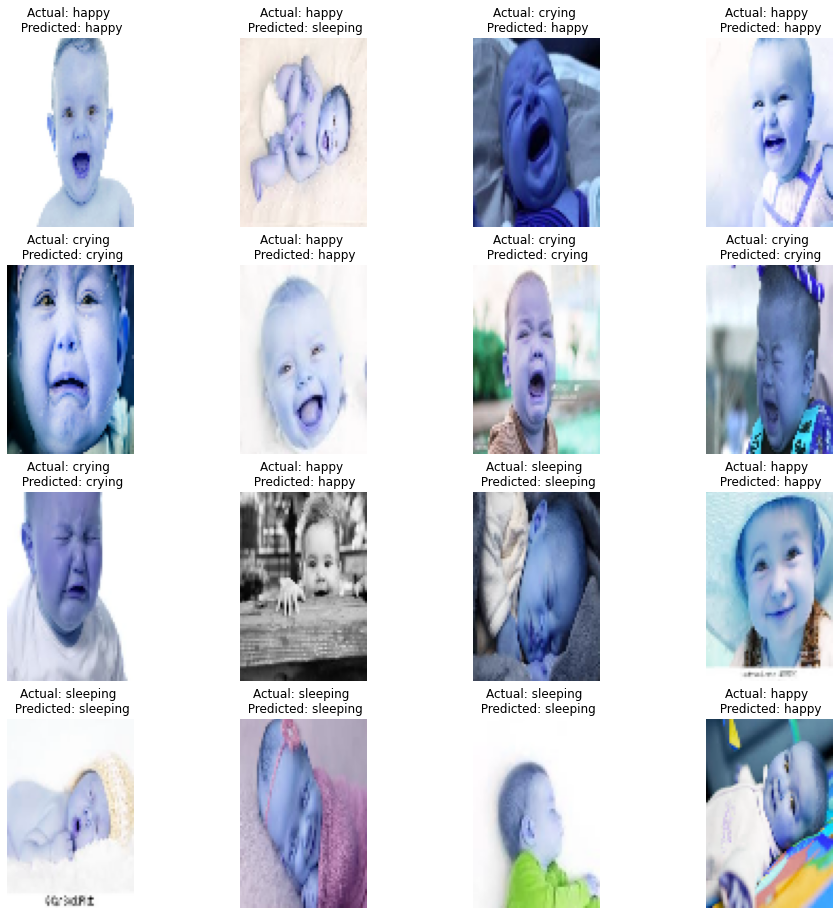

In [35]:
prediction = loaded_model.predict_classes(x_test)

plt.figure(figsize=(16,16))

for i in range(1,row*column + 1):
  plt.subplot(row,column,i)
  plt.imshow(x_test[i])
  plt.title(f'Actual: {categories[y_test_cls[i]]} \n Predicted: {categories[prediction[i]]}')
  plt.axis('off')
plt.show()

# **Loss and Accuracy Plot**

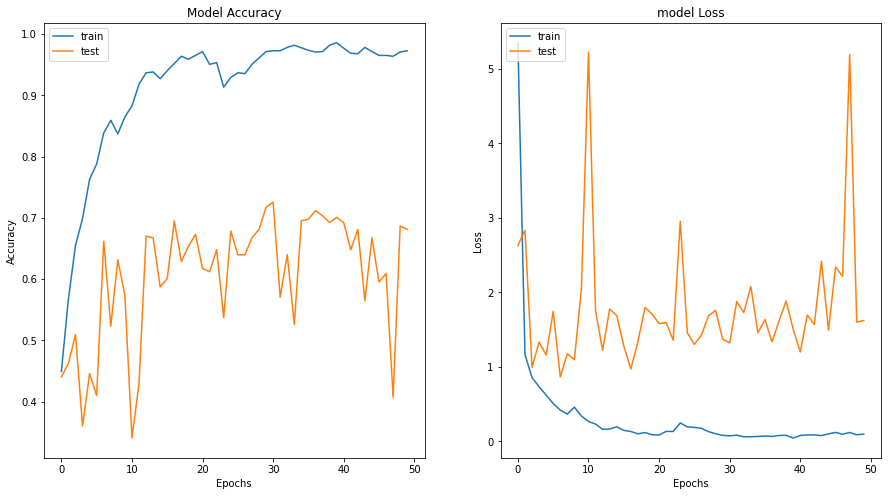

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(myModel.history['accuracy'])
plt.plot(myModel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(myModel.history['loss'])
plt.plot(myModel.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

cm_train = confusion_matrix(y_train_cls, prediction_train)
print("Confusion Matrix")
print(cm_train)

cr_train = classification_report(y_train_cls, prediction_train, target_names=categories)
print("\nClassification Report")
print(cr_train)

Confusion Matrix
[[354   1   3]
 [  1 613   0]
 [  2   1 469]]

Classification Report
              precision    recall  f1-score   support

      crying       0.99      0.99      0.99       358
       happy       1.00      1.00      1.00       614
    sleeping       0.99      0.99      0.99       472

    accuracy                           0.99      1444
   macro avg       0.99      0.99      0.99      1444
weighted avg       0.99      0.99      0.99      1444



In [39]:
from sklearn.metrics import classification_report, confusion_matrix

cm_train = confusion_matrix(y_test_cls, prediction)
print("Confusion Matrix")
print(cm_train)

cr_train = classification_report(y_test_cls, prediction, target_names=categories)
print("\nClassification Report")
print(cr_train)

Confusion Matrix
[[ 45  28   6]
 [ 25 134   7]
 [ 19  30  67]]

Classification Report
              precision    recall  f1-score   support

      crying       0.51      0.57      0.54        79
       happy       0.70      0.81      0.75       166
    sleeping       0.84      0.58      0.68       116

    accuracy                           0.68       361
   macro avg       0.68      0.65      0.66       361
weighted avg       0.70      0.68      0.68       361



In [40]:
import urllib.request
from matplotlib import image

def get_picture(url):
    urllib.request.urlretrieve(url,'baby_image.jpg')
    
    img = image.imread('baby_image.jpg')
    img = cv2.resize(img,(60,90))

    return img

In [41]:
url = input("Enter URL of a baby image: ")

Enter URL of a baby image: http://www.newbornbabyzone.com/wp-content/uploads/2010/06/baby-shots-20.jpg


(-0.5, 59.5, 89.5, -0.5)

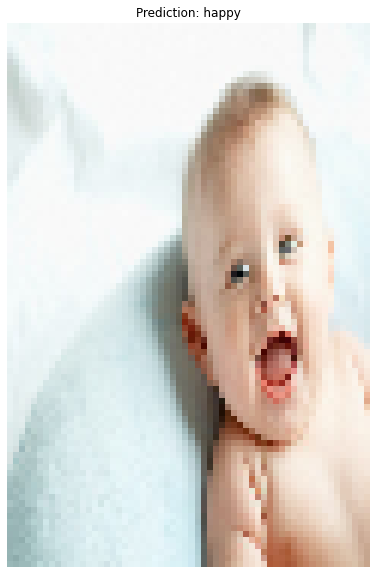

In [47]:
my_image = get_picture(url)

img = np.expand_dims(my_image, axis=0)
img = np.array(img)
pred = loaded_model.predict_classes([img])[0]

plt.figure(figsize=(10,10))
plt.imshow(my_image)
plt.title(f'Prediction: {categories[pred]}')
plt.axis("off")